## Data collection

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving customer-survey-data.csv to customer-survey-data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('customer-survey-data.csv')
print(df.head())

   Customer  \
0         1   
1         2   
2         3   
3         4   
4         5   

   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied  \
0                                                5.0                                                                                                          
1                                                3.0                                                                                                          
2                                                4.0                                                                                                          
3                                                5.0                                                                                                          
4                                                2.0                                                              

In [ ]:
df.shape

(10616, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 5 columns):
 #   Column                                                                                                                                                      Non-Null Count  Dtype  
---  ------                                                                                                                                                      --------------  -----  
 0   Customer                                                                                                                                                    10616 non-null  int64  
 1   How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    10198 non-null  float64
 2   How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely sat

In [ ]:
df.describe()

,Customer,How satisfied were you with your overall delivery experience at Ali? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the quality of the food at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied,How satisfied were you with the speed of delivery at Alis? 1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied
count,10616.000000,10198.000000,10364.000000,10377.000000
mean,5308.500000,3.325260,3.332015,3.322926
std,3064.719563,1.419754,1.414709,1.408918
min,1.000000,1.000000,1.000000,1.000000
25%,2654.750000,2.000000,2.000000,2.000000
50%,5308.500000,3.000000,3.000000,3.000000
75%,7962.250000,5.000000,5.000000,5.000000
max,10616.000000,5.000000,5.000000,5.000000


In [ ]:
print(df.isnull().sum())

Customer                                                                                                                                                        0
How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied      418
How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied     252
How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied    239
Was your order accurate? Please respond yes or no.                                                                                                            660
dtype: int64


In [ ]:
df = df.dropna()

In [ ]:
df.columns

Index(['Customer',
       'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied',
       'Was your order accurate? Please respond yes or no.'],
      dtype='object')

In [ ]:
df.rename(columns={
    'How satisfied were you with your overall delivery experience at Ali?                    1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Satisfaction_Overall',
    'How satisfied were you with the quality of the food at Alis?                             1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Satisfaction_Quality',
    'How satisfied were you with the speed of delivery at Alis?                                1-5 where 1 = extremely dissatisfied and 5 = extremely satisfied': 'Satisfaction_Speed',
    'Was your order accurate? Please respond yes or no.': 'Order_Accurate'
}, inplace=True)

In [ ]:
df.columns

Index(['Customer', 'Satisfaction_Overall', 'Satisfaction_Quality',
       'Satisfaction_Speed', 'Order_Accurate'],
      dtype='object')

In [ ]:
df['Satisfaction_Overall'].unique()

array([5., 3., 4., 2., 1.])

In [ ]:
df['Satisfaction_Quality'].unique()

array([3., 4., 5., 2., 1.])

In [ ]:
df['Satisfaction_Speed'].unique()

array([4., 3., 2., 1., 5.])

In [ ]:
df['Order_Accurate'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['Order_Accurate'] = df['Order_Accurate'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Order_Accurate'].unique()

array([1, 0])

In [ ]:
df.head()

,Customer,Satisfaction_Overall,Satisfaction_Quality,Satisfaction_Speed,Order_Accurate
0,1,5.0,3.0,4.0,1
1,2,3.0,4.0,3.0,1
2,3,4.0,5.0,2.0,1
3,4,5.0,3.0,4.0,1
4,5,2.0,5.0,1.0,1


## EDA - Exploratory Data Analysis

In [ ]:
# Total and average scores
aspect_of_satisfaction = ['Satisfaction_Overall', 'Satisfaction_Quality', 'Satisfaction_Speed']
df['Total_Score'] = df[aspect_of_satisfaction].sum(axis=1)
df['Avg_Score'] = df[aspect_of_satisfaction].mean(axis=1)

# Make category based on average of scores
def to_category(score):
    if score <= 2:
        return 'Not satisfied'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Satisfied'

df['Category_of_Satisfaction'] = df['Avg_Score'].apply(to_category)

In [ ]:
# Average scores of every aspects
print("Average scores of every aspects:")
print(df[aspect_of_satisfaction].mean())

Average scores of every aspects:
Satisfaction_Overall    3.321609
Satisfaction_Quality    3.335054
Satisfaction_Speed      3.322792
dtype: float64


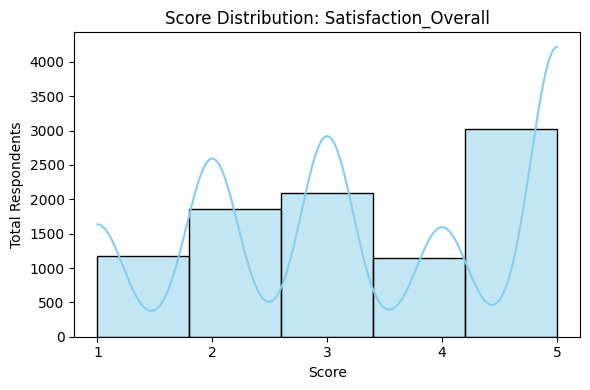

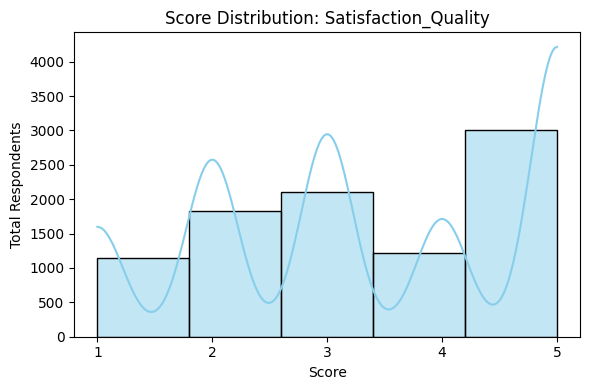

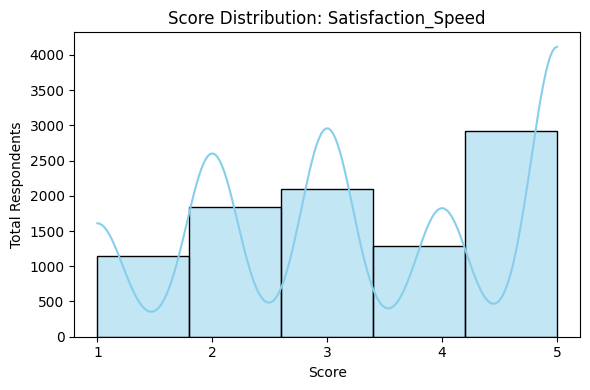

In [ ]:
# Histogram of score distribution for each satisfaction aspect
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for kolom in aspect_of_satisfaction:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=kolom, bins=5, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Score Distribution: {kolom}')
    plt.xlabel('Score')
    plt.ylabel('Total Respondents')
    plt.xticks([1, 2, 3, 4, 5])
    plt.tight_layout()
    plt.show()

In [ ]:
# Comparison of Order Accuracy vs Average Satisfaction
print("Average satisfaction based on order accuracy:")
print(df.groupby('Order_Accurate')[aspect_of_satisfaction].mean())


Average satisfaction based on order accuracy:
                Satisfaction_Overall  Satisfaction_Quality  Satisfaction_Speed
Order_Accurate                                                                
0                           3.290943              3.345660            3.290189
1                           3.333835              3.330826            3.335791


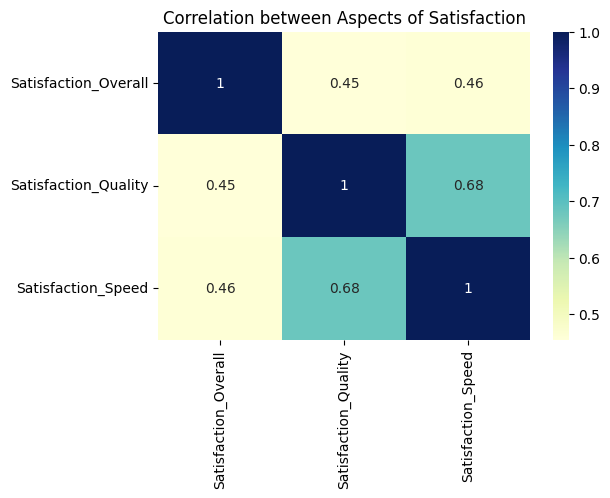

In [ ]:
# Correlation Between Aspects
plt.figure(figsize=(6,4))
sns.heatmap(df[aspect_of_satisfaction].corr(), annot=True, cmap='YlGnBu')
plt.title("Correlation between Aspects of Satisfaction")
plt.show()

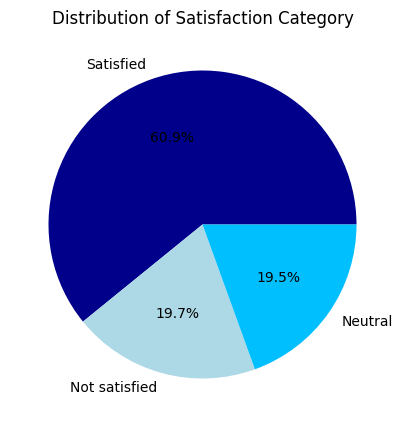

In [ ]:
# Pie Chart Satisfaction Category
plt.figure(figsize=(5,5))
df['Category_of_Satisfaction'].value_counts().plot.pie(autopct='%1.1f%%', colors=['darkblue', 'lightblue', 'deepskyblue'])
plt.title('Distribution of Satisfaction Category')
plt.ylabel('')
plt.show()